In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('train.csv')
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
df.isnull().sum() # number of missing values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
df.isnull().mean() * 100 #percentage of missing values

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


<Axes: xlabel='LotFrontage', ylabel='Density'>

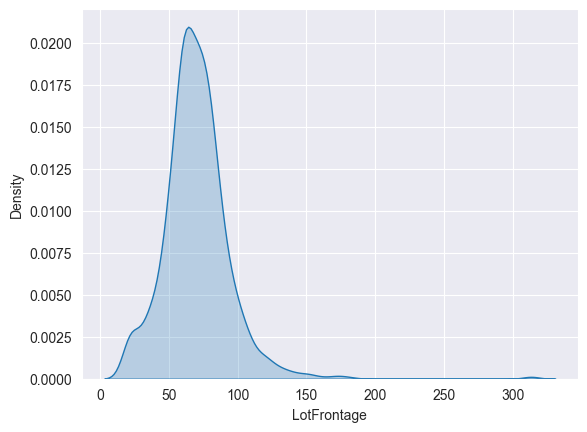

In [21]:
sns.kdeplot(data=df, x='LotFrontage', fill=True)

In [22]:
df.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [23]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [24]:
missing_values = df['Alley'].isnull().mean() * 100
missing_values

np.float64(93.76712328767123)

<Axes: xlabel='MasVnrType', ylabel='count'>

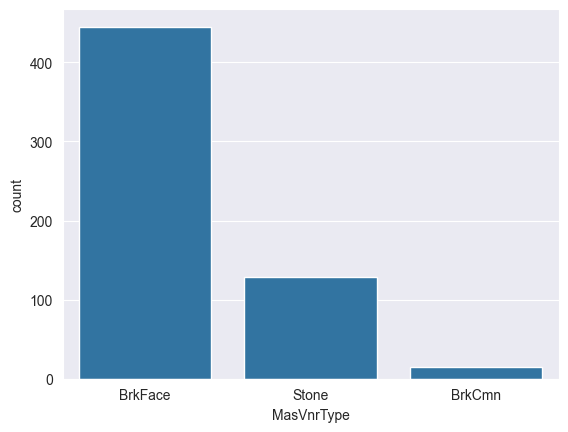

In [25]:
sns.countplot(data=df, x='MasVnrType')

In [26]:
df = df.drop('MasVnrType', axis=1)

<Axes: xlabel='MasVnrArea', ylabel='Density'>

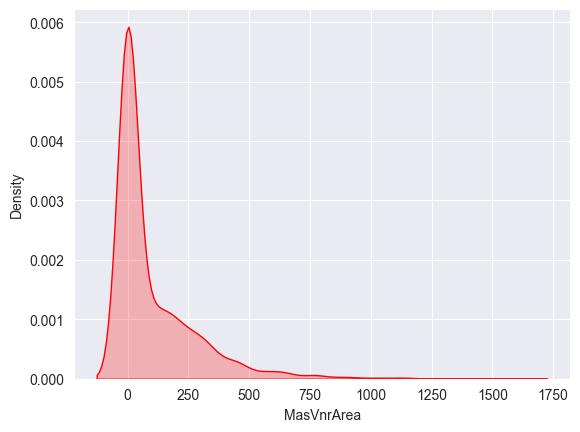

In [27]:
sns.kdeplot(data=df,x='MasVnrArea', fill=True,color='red')

<Axes: xlabel='MasVnrArea', ylabel='Count'>

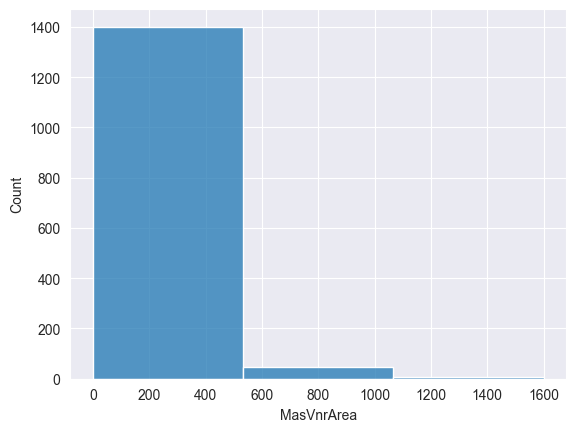

In [28]:
sns.histplot(data=df,x='MasVnrArea',bins=3)

In [29]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [30]:
df['BsmtQual'].isnull().mean() *  100

np.float64(2.5342465753424657)

In [31]:
df[['BsmtQual', 'BsmtCond']]

,BsmtQual,BsmtCond
0,Gd,TA
1,Gd,TA
2,Gd,TA
3,TA,Gd
4,Gd,TA
...,...,...
1455,Gd,TA
1456,Gd,TA
1457,TA,Gd
1458,TA,TA


<Axes: xlabel='BsmtQual', ylabel='count'>

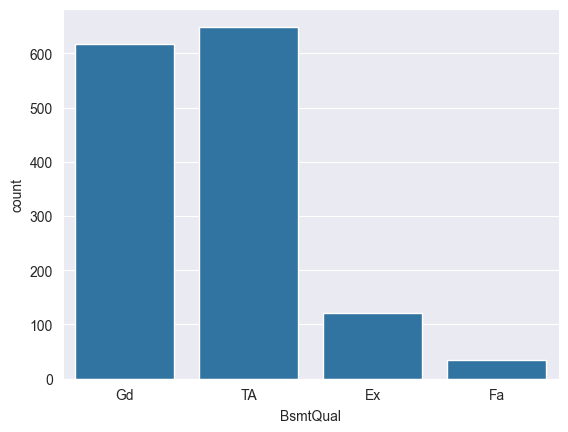

In [32]:
sns.countplot(data=df, x='BsmtQual')

In [33]:
df = df.drop('Alley', axis= 1)

In [34]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 79, dtype: float64

In [35]:
df = df.drop(['PoolQC','Fence','MiscFeature'], axis=1)

In [36]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64

<Axes: xlabel='count', ylabel='BsmtCond'>

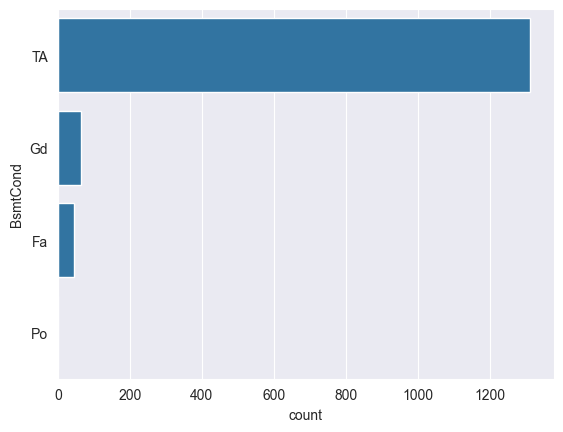

In [37]:
sns.countplot(data=df['BsmtCond'])

In [38]:
mode_val = df['BsmtCond'].mode()[0]
df['BsmtCond'] = df['BsmtCond'].fillna(mode_val)

In [39]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64

<Axes: xlabel='BsmtQual', ylabel='count'>

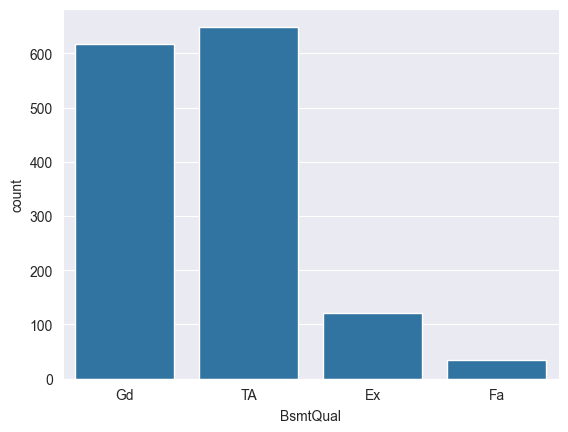

In [40]:
sns.countplot(data=df, x='BsmtQual')

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

known = df[df['BsmtQual'].notnull()]
unknown = df[df['BsmtQual'].isnull()]

features = ['TotalBsmtSF', 'BsmtCond', 'BsmtFinSF1']

encoder = OrdinalEncoder()
known_encoded = known.copy()
unknown_encoded = unknown.copy()

known_encoded[features] = encoder.fit_transform(known[features])
unknown_encoded[features] = encoder.fit_transform(unknown[features])

X = known_encoded[features]
y = known['BsmtQual']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = model.predict(unknown_encoded[features])



In [42]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64

<Axes: xlabel='BsmtExposure', ylabel='count'>

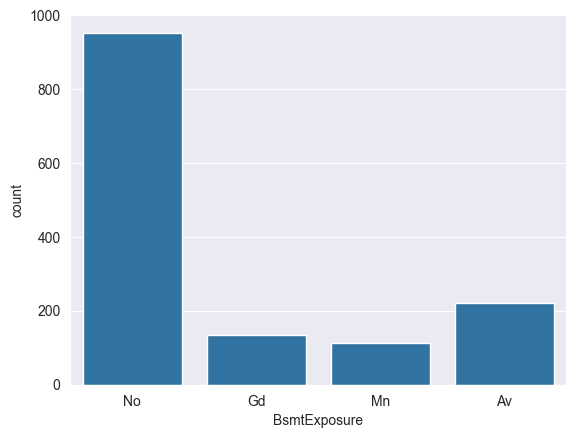

In [43]:
sns.countplot(data=df, x='BsmtExposure')

In [44]:
# Fill 'No' only for rows with no basement
df.loc[(df['BsmtExposure'].isnull()) & (df['TotalBsmtSF'] == 0), 'BsmtExposure'] = 'No'

# Fill the rest with mode
exp_mode = df['BsmtExposure'].mode()[0]
df['BsmtExposure'] = df['BsmtExposure'].fillna(exp_mode)


In [45]:
df['BsmtFinType1'].isnull().mean() * 100

np.float64(2.5342465753424657)

<Axes: xlabel='BsmtFinType1', ylabel='count'>

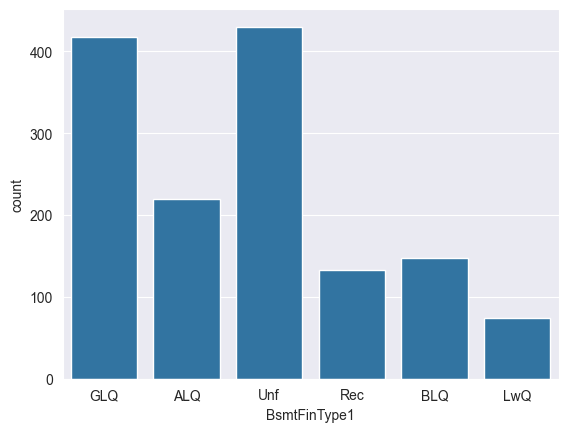

In [46]:
import seaborn as sns
sns.countplot(data=df, x='BsmtFinType1')

In [47]:
df.notnull().mean() * 100

Id               100.0
MSSubClass       100.0
MSZoning         100.0
LotFrontage      100.0
LotArea          100.0
                 ...  
MoSold           100.0
YrSold           100.0
SaleType         100.0
SaleCondition    100.0
SalePrice        100.0
Length: 76, dtype: float64

In [48]:
df = df.drop('FireplaceQu', axis = 1)

<Axes: xlabel='GarageQual', ylabel='count'>

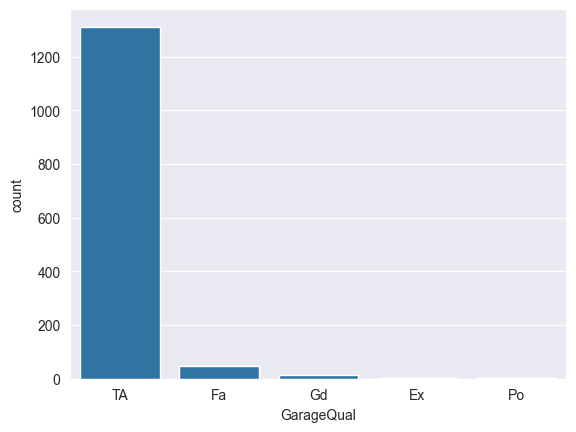

In [58]:
sns.countplot(data=df,x='GarageQual')

<Axes: xlabel='GarageCond', ylabel='count'>

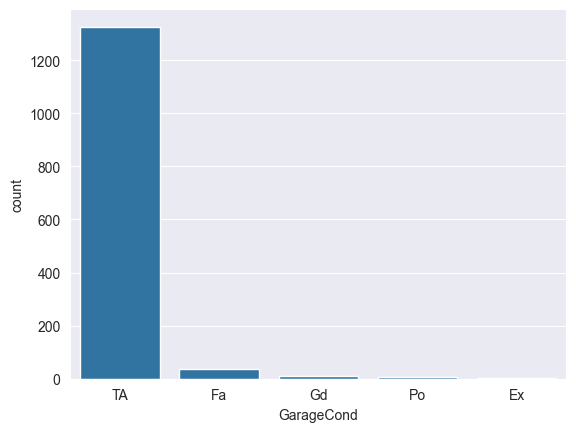

In [59]:
sns.countplot(data=df,x='GarageCond')

In [60]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [61]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [62]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 75, dtype: float64

In [63]:
df[['BsmtFinType1','BsmtFinType2']]

,BsmtFinType1,BsmtFinType2
0,GLQ,Unf
1,ALQ,Unf
2,GLQ,Unf
3,ALQ,Unf
4,GLQ,Unf
...,...,...
1455,Unf,Unf
1456,ALQ,Rec
1457,GLQ,Unf
1458,GLQ,Rec


<Axes: xlabel='BsmtFinType1', ylabel='count'>

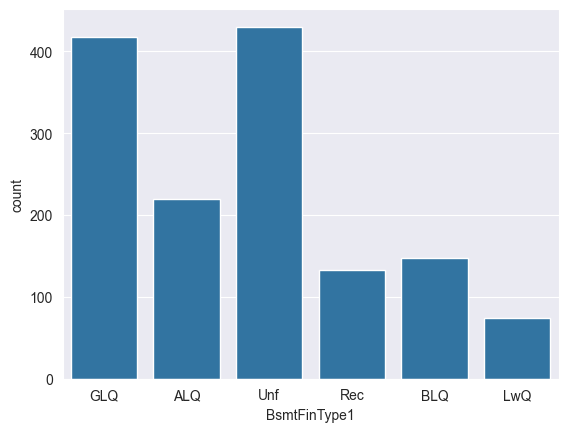

In [64]:
sns.countplot(data=df, x='BsmtFinType1')

<Axes: xlabel='BsmtFinType2', ylabel='count'>

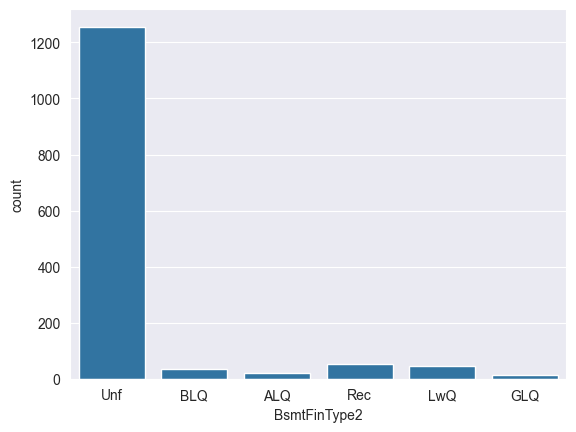

In [65]:
sns.countplot(data=df, x='BsmtFinType2')

In [66]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [67]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 75, dtype: float64

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

target_col = 'BsmtFinType1'

df.loc[df["TotalBsmtSF"] == 0, target_col] = df.loc[df["TotalBsmtSF"] == 0, target_col].fillna("None")

known = df[df['BsmtFinType1'].notna()]
unknown = df[df['BsmtFinType1'].isna()]

categorical = ["BsmtQual", "BsmtCond", "BsmtExposure"]
numeric = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
features = categorical + numeric

X_train = known[features]
y_train = known[target_col]
X_pred = unknown[features]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical),
        ("num", SimpleImputer(strategy="median"), numeric),
    ],
    remainder="drop"
)

clf = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)
pred = clf.predict(X_pred)

df.loc[df[target_col].isna(), target_col] = pred


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by SimpleImputer.

In [70]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 75, dtype: float64

<Axes: xlabel='GarageType', ylabel='count'>

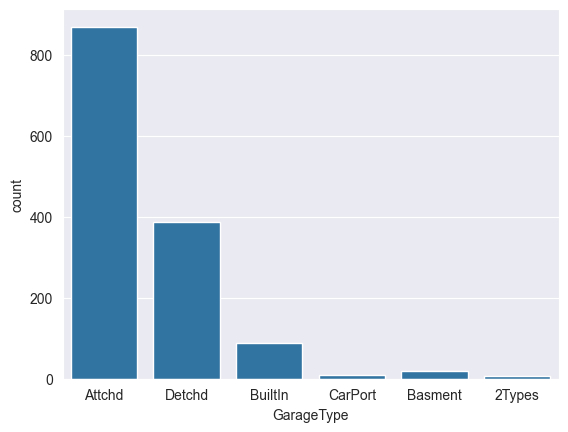

In [73]:
sns.countplot(data=df, x='GarageType')

In [72]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [74]:
df.isnull().mean() * 100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 75, dtype: float64

<Axes: xlabel='GarageType', ylabel='count'>

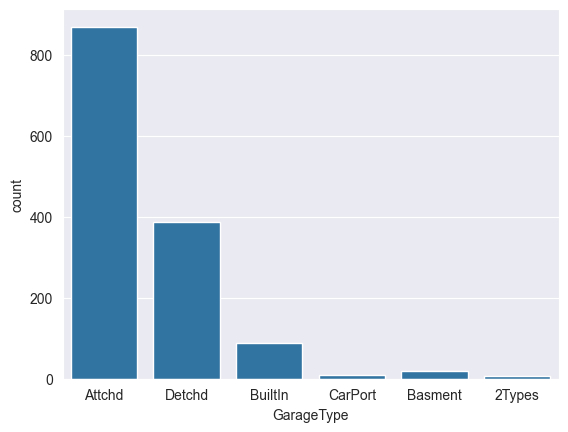

In [77]:
sns.countplot(
    data=df,
    x='GarageType')

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

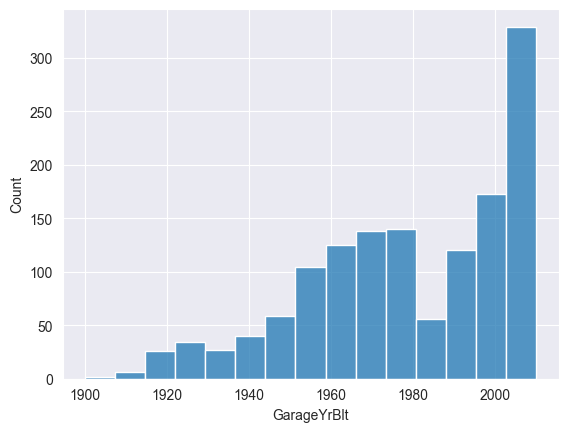

In [80]:
sns.histplot(
    data=df,
    x='GarageYrBlt')

<Axes: xlabel='GarageFinish', ylabel='Count'>

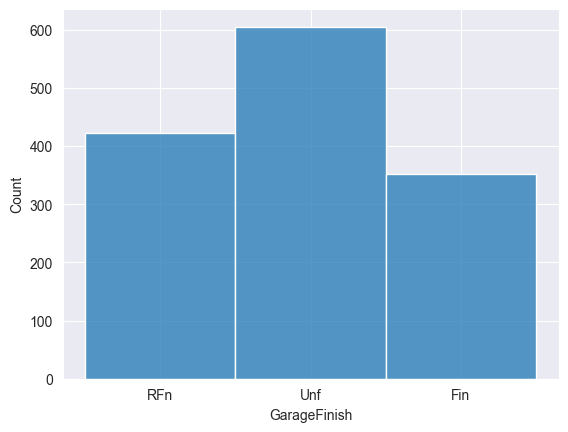

In [81]:
sns.histplot(
    data=df,
    x='GarageFinish')

In [83]:
cols = ["GarageType", "GarageYrBlt", "GarageFinish"]

area_zero = (df["GarageArea"]==0) if "GarageArea" in df.columns else False
cars_zero = (df["GarageCars"]==0) if "GarageCars" in df.columns else False
no_garage_mask = (df["GarageType"].isna() & df["GarageFinish"].isna()) & (area_zero | cars_zero)

df.loc[no_garage_mask, "GarageType"]   = "NoGarage"
df.loc[no_garage_mask, "GarageFinish"] = "NoGarage"
df.loc[no_garage_mask, "GarageYrBlt"]  = 0

has_garage_mask = df["GarageType"].ne("NoGarage")
df.loc[has_garage_mask & df["GarageYrBlt"].isna(), "GarageYrBlt"] = df.loc[has_garage_mask, "YearBuilt"]

finish_mode_by_type = (
    df.loc[has_garage_mask & df["GarageFinish"].notna()]
      .groupby("GarageType")["GarageFinish"]
      .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else "Unf")
)
df.loc[has_garage_mask & df["GarageFinish"].isna(), "GarageFinish"] = \
    df.loc[has_garage_mask, "GarageType"].map(finish_mode_by_type)


tmp_decade = (df["GarageYrBlt"].fillna(df["YearBuilt"])//10)*10
grp = df.assign(_decade=tmp_decade)

type_mode_by_grp = (
    grp.loc[grp["GarageType"].notna()]
       .groupby(["GarageFinish","_decade"])["GarageType"]
       .agg(lambda s: s.mode().iloc[0])
)

need_type = has_garage_mask & df["GarageType"].isna()
df.loc[need_type, "GarageType"] = pd.MultiIndex.from_frame(
    pd.DataFrame({"GarageFinish": df.loc[need_type, "GarageFinish"],
                  "_decade": tmp_decade.loc[need_type]})
).map(type_mode_by_grp)

for c in ["GarageType","GarageFinish"]:
    if df[c].isna().any():
        df[c].fillna(df[c].mode().iloc[0], inplace=True)



